### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting.


(1) What is the independent variable? What is the dependent variable?

Time is the dependent variable, while "Congruent," "Incongruent" are independent variables. 

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

$H_0$ = null hypothesis <br>
$H_1$ = alternate hypothesis

$\mu_{c}$ = mean of congruent <br>
$\mu_{ic}$ = mean of incongruent

$H_0: $ $\mu_{c}$ $=$ $\mu_{ic}$ (Mean of congruent words is equal to the mean of incongruent, no differance in the performance of two samples) <br>
$H_1: $ $\mu_{c}$ $\neq$ $\mu_{ic}$ (Mean of congruent words is not equal to the mean of incongruent, there is a differance in performance of two samples)

Because there is a differance before and post-experiment and because we have the same group we will use a dependant paired t-test for the two samples.


(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('stroopdata.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes


In [5]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


For "Congruent," the mean=14.05 and the std=3.56, while for "Incongruent," the mean=22.02 and the std=4.80. From this we can observe that there is a diffence in means, but a statistical test is required for validation.

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

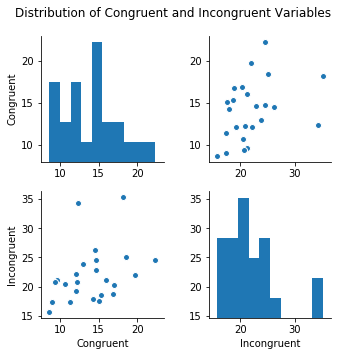

In [11]:
pairplot = sns.pairplot(df)
pairplot.fig.suptitle('Distribution of Congruent and Incongruent Variables', size=12)
pairplot.fig.subplots_adjust(top=.9)
#https://stackoverflow.com/questions/28638158/seaborn-facetgrid-how-to-leave-proper-space-on-top-for-suptitle

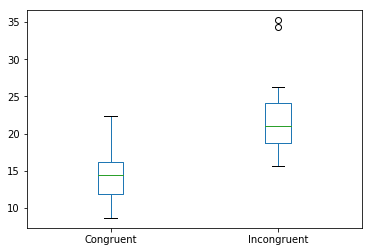

In [8]:
df[['Congruent','Incongruent']].plot(kind='box')

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([  8.63 ,   8.987,   9.401,   9.564,  10.639,  11.344,  12.079,
          12.13 ,  12.238,  12.369,  12.944,  14.233,  14.48 ,  14.669,
          14.692,  15.073,  15.298,  16.004,  16.791,  16.929,  18.2  ,
          18.495,  19.71 ,  22.328])),
 (3.6805237082632325, 14.051124999999999, 0.98800235955534976))

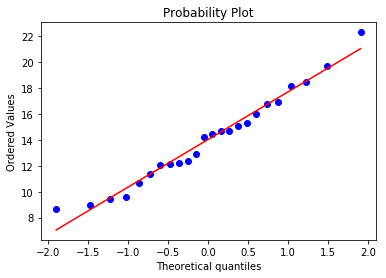

In [13]:
stats.probplot(df['Congruent'], plot= plt)

((array([-1.90380091, -1.48287381, -1.22601535, -1.03156092, -0.8698858 ,
         -0.7282709 , -0.59996024, -0.48085763, -0.36822879, -0.26009875,
         -0.154935  , -0.05146182,  0.05146182,  0.154935  ,  0.26009875,
          0.36822879,  0.48085763,  0.59996024,  0.7282709 ,  0.8698858 ,
          1.03156092,  1.22601535,  1.48287381,  1.90380091]),
  array([ 15.687,  17.394,  17.425,  17.51 ,  17.96 ,  18.644,  18.741,
          19.278,  20.33 ,  20.429,  20.762,  20.878,  21.157,  21.214,
          22.058,  22.158,  22.803,  23.894,  24.524,  24.572,  25.139,
          26.282,  34.288,  35.255])),
 (4.6212893156122012, 22.015916666666669, 0.92046715643061794))

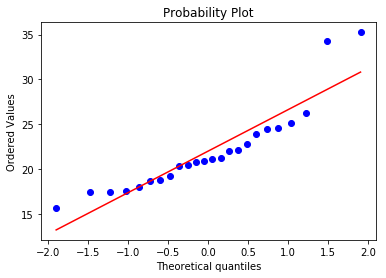

In [15]:
stats.probplot(df['Incongruent'], plot= plt)

To proceed with the t-test, the distribution should be close to normal and there should not be any significant outliers. The distributions somewhat resemble a normal distribution in the histograms, for "Incongruent," there are a couple of outliers. But, overall, especially with the probability plot its possible to see that there are no significant deviations.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [9]:
stats.ttest_rel(df['Congruent'],df['Incongruent']) 

Ttest_relResult(statistic=-8.020706944109957, pvalue=4.1030005857111781e-08)

df=24-1=23 <br>
At a 95% confedence interval and df=23, the t-critical is 2.069. Because the absolute value of the t-value is greater than the critical, I reject the null hypothesis, therefore there is a differance in performance. This fits with my expectation that it is more difficult to read the "Incongruent" words and the result will not be the same as for "Congruent."


##### References used:

- http://blog.minitab.com/blog/statistics-and-quality-data-analysis/t-for-2-should-i-use-a-paired-t-or-a-2-sample-t?fbclid=IwAR1UOzIPlHmuxBd3MzUzWQ23mYe3cezcUT6tPrhiMD2ki3saOvunW67uXdI


- https://pythonfordatascience.org/paired-samples-t-test-python/?fbclid=IwAR0xwZ0vwfze0LIQtUjKcg7uNwNKmhxc9f6Pq5aeIfRP-YBdQMSb5itervk
